# Reconocimento de horas en relos analógico

Se utiliza el [dataset de relojes de Kaggles](https://www.kaggle.com/datasets/gpiosenka/time-image-datasetclassification) para entrenar un modelo de reconocimiento de horas en relojes analógicos.

In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import pandas as pd
import zipfile
import numpy as np
import os


In [71]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

## Decompresión de imágenes

Descomprimir dataset para trabajar con ello. Estos ficheros no se subiran al github

In [31]:
local_zip = './tmp/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./Assets/dataset')
zip_ref.close()

## Lectura de datos

## Lectura fichero csv

In [32]:
root_dir = './Assets/dataset'
csv_data = pd.read_csv(os.path.join(root_dir,'clocks.csv'))

In [33]:
hours_dict = pd.Series(csv_data['labels'].values, index=csv_data['class index']).to_dict()

In [34]:
train_labels = csv_data[csv_data['data set'] == "train"]['class index'].values
test_labels = csv_data[csv_data['data set'] == "test"]['class index'].values
valid_labels = csv_data[csv_data['data set'] == "valid"]['class index'].values

train_images_dir = csv_data[csv_data['data set'] == "train"]['filepaths'].values
test_images_dir = csv_data[csv_data['data set'] == "test"]['filepaths'].values
valid_images_dir = csv_data[csv_data['data set'] == "valid"]['filepaths'].values

### Mostrar imagenes aleatorias

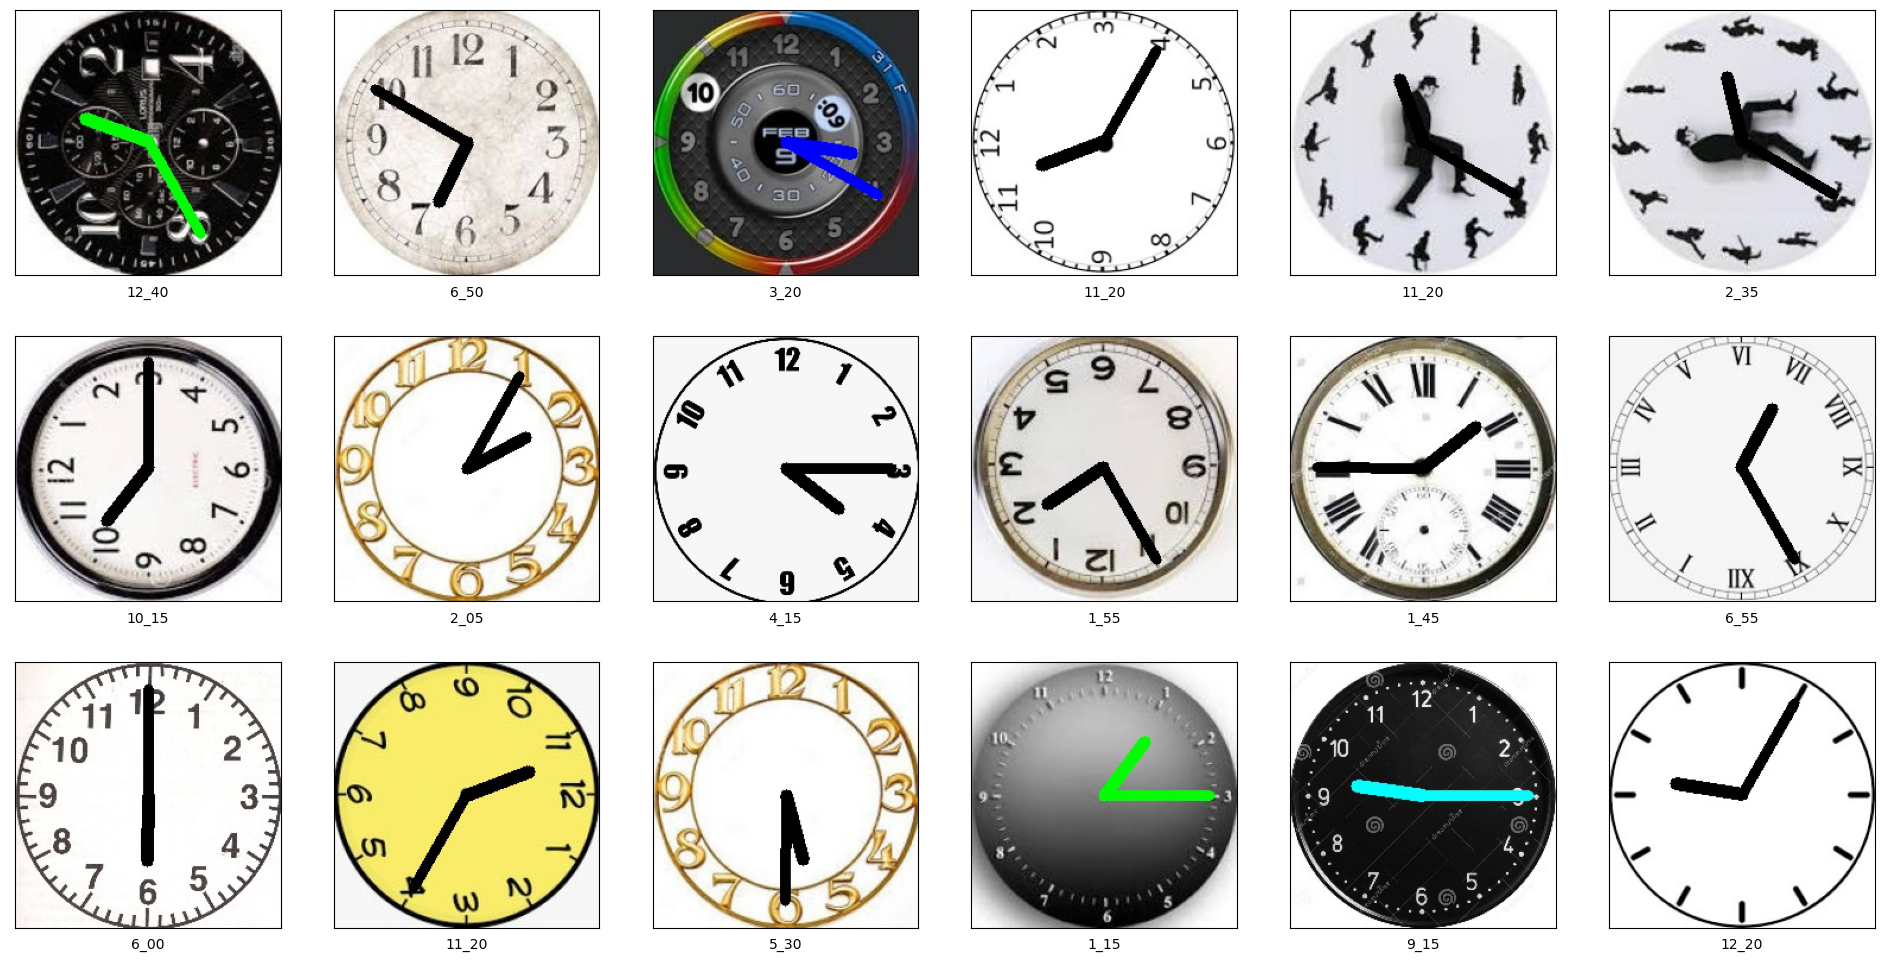

In [110]:
nrows = 3
ncols = 6



fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

idx = np.random.randint(0, len(train_images_dir), size=(nrows * ncols))

labels_filepaths = csv_data.loc[idx, ['labels','filepaths']].values
labels = csv_data.loc[idx, ['labels']].values
filepaths = csv_data.loc[idx, ['filepaths']].values
# next_images = csv_data['filepaths'].sample(n=nrows * ncols).values


for i, label in enumerate(labels):
  # coge el ndarray correcto y el elemento 0 ya que solo tiene ese valor
  img_path = filepaths[i][0]
  full_img_path = os.path.join(root_dir, img_path)

  sp = plt.subplot(nrows, ncols, i + 1)
  plt.xticks([])
  plt.yticks([]) 
  plt.grid(False)

  img = mpimg.imread(full_img_path)
  plt.imshow(img)
  plt.xlabel(label[0])

plt.show()

### Cargar las imagenes en memoria

## Procesamiento de datos